# WeatherPy


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#df = pd.DataFrame(lat_lngs, columns = ['lat', 'long'])
#df.head()

In [15]:
# Identify nearest city for each lat, lng combination
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# API call for one city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_number = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
Lat=[]
Lon=[]
ciudades=[]
k=0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Build query URL and request results
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get weather data
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if  weather_json["cod"] != "404":
    # Get responses from json
        city_number.append(weather_json["cod"])
        temperature.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])  
        Lat.append(weather_json['coord']['lat'])
        Lon.append(weather_json['coord']['lon'])
        ciudades.append(city) 
    else:
        print(city + " not found. Skipping...")
        
    #Include a print log of each city as it's being processed with the city number and city name.
    print(f"Procesing record {k} city {city}")
    k=k+1    

Procesing record 0 city mar del plata
Procesing record 1 city rikitea
Procesing record 2 city new norfolk
katsiveli not found. Skipping...
Procesing record 3 city katsiveli
Procesing record 4 city srivardhan
Procesing record 5 city soyo
belushya guba not found. Skipping...
Procesing record 6 city belushya guba
Procesing record 7 city bluff
Procesing record 8 city laguna
Procesing record 9 city vestmanna
Procesing record 10 city anadyr
taolanaro not found. Skipping...
Procesing record 11 city taolanaro
Procesing record 12 city saskylakh
Procesing record 13 city caraguatatuba
Procesing record 14 city nanortalik
Procesing record 15 city erenhot
Procesing record 16 city altamira
Procesing record 17 city tuatapere
Procesing record 18 city tiksi
Procesing record 19 city tommot
Procesing record 20 city ribeira grande
Procesing record 21 city kahului
Procesing record 22 city atuona
Procesing record 23 city nemuro
Procesing record 24 city albany
Procesing record 25 city necochea
Procesing recor

Procesing record 214 city alipur
Procesing record 215 city puerto carreno
Procesing record 216 city muros
Procesing record 217 city breves
Procesing record 218 city sabha
Procesing record 219 city nalut
Procesing record 220 city saldanha
Procesing record 221 city walvis bay
Procesing record 222 city sandwick
Procesing record 223 city la ronge
Procesing record 224 city capaci
Procesing record 225 city madhupur
Procesing record 226 city lakatoro
Procesing record 227 city atasu
Procesing record 228 city vanderhoof
Procesing record 229 city los llanos de aridane
Procesing record 230 city cabo san lucas
Procesing record 231 city sosnogorsk
Procesing record 232 city ramsar
Procesing record 233 city malanje
saleaula not found. Skipping...
Procesing record 234 city saleaula
Procesing record 235 city longido
Procesing record 236 city marawi
Procesing record 237 city saint-georges
Procesing record 238 city sitka
Procesing record 239 city riyadh
Procesing record 240 city kinablangan
Procesing rec

Procesing record 430 city puerto el triunfo
Procesing record 431 city salgotarjan
Procesing record 432 city north bend
Procesing record 433 city redlands
Procesing record 434 city esperance
Procesing record 435 city andra
Procesing record 436 city nizwa
samalaeulu not found. Skipping...
Procesing record 437 city samalaeulu
Procesing record 438 city zhanaozen
Procesing record 439 city ballina
Procesing record 440 city leon valley
burica not found. Skipping...
Procesing record 441 city burica
Procesing record 442 city petrovsk-zabaykalskiy
Procesing record 443 city codrington
chengmai not found. Skipping...
Procesing record 444 city chengmai
Procesing record 445 city meulaboh
Procesing record 446 city sibu
Procesing record 447 city morant bay
Procesing record 448 city poiana stampei
Procesing record 449 city tambun
Procesing record 450 city antipovka
Procesing record 451 city chokurdakh
Procesing record 452 city maniitsoq
Procesing record 453 city yaan
Procesing record 454 city francisco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a data frame from cities, and variable
weather_dict = {
    "city": ciudades,
    "Temperature": temperature, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness, 
    "Wind speed": wind_speed, 
    "Lat": Lat, 
    "Lng": Lon 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,Temperature,Humidity,Cloudiness,Wind speed,Lat,Lng
0,mar del plata,45.83,70,0,3.89,-46.43,-67.52
1,rikitea,73.55,83,37,15.21,-23.12,-134.97
2,new norfolk,48.60,66,75,11.41,-42.78,147.06
3,srivardhan,80.21,84,100,13.31,18.03,73.02
4,soyo,71.60,83,90,4.70,-6.13,12.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

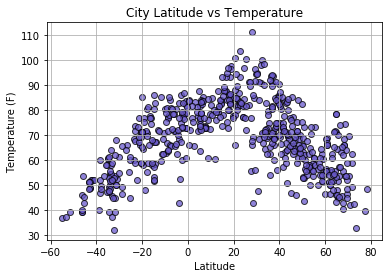

In [21]:
# Latitude vs. Temperature Plot
plt.scatter(weather_data["Lat"], weather_data["Temperature"], marker="o", 
            facecolors="slateblue", edgecolors="black", alpha=0.75)
  
# Incorporate the other graph properties
#plt.ylim(y0,y1 )
#plt.xlim(-90, 90)
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Temperature")

# Save Figure
plt.savefig("temp.png")

# Prints the scatter plot to the screen
plt.show()

#### Latitude vs. Humidity Plot

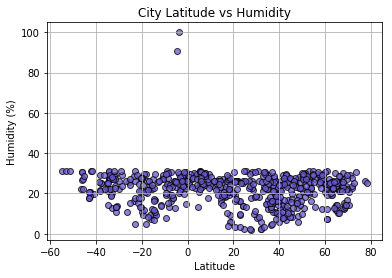

In [28]:
# Calculate y-axis, humidity percentage
humdidity_percentage= 100*weather_data["Humidity"]/max(weather_data["Humidity"])

# plot scatter
plt.scatter(weather_data["Lat"], humdidity_percentage, marker="o", 
            facecolors="slateblue", edgecolors="black", alpha=0.75)
  
# Incorporate the other graph properties
#plt.ylim(0, 110 )
#plt.xlim(-90, 90)
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

# Save Figure
plt.savefig("humidity.png")

# Prints the scatter plot to the screen
plt.show()

#### Latitude vs. Cloudiness Plot

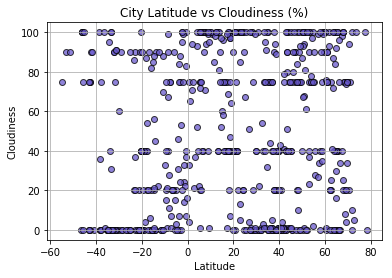

In [30]:
# plot scatter
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", 
            facecolors="slateblue", edgecolors="black", alpha=0.75)
  
# Incorporate the other graph properties
#plt.ylim(0, 110 )
#plt.xlim(-90, 90)
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (%)")

# Save Figure
plt.savefig("Cloudiness.png")

# Prints the scatter plot to the screen
plt.show()

#### Latitude vs. Wind Speed Plot

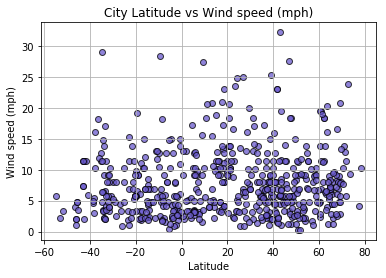

In [31]:
# plot scatter
plt.scatter(weather_data["Lat"], weather_data["Wind speed"], marker="o", 
            facecolors="slateblue", edgecolors="black", alpha=0.75)
  
# Incorporate the other graph properties
#plt.ylim(0, 110 )
#plt.xlim(-90, 90)
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind speed (mph)")

# Save Figure
plt.savefig("Wind_Speed.png")

# Prints the scatter plot to the screen
plt.show()

#Comments on trends

1) if you are north enough as you go south temperature tends to increase. Simetrically,  if you are south enough as you go north temperature tends to increase

2) According to the data analyzed, it does not looks like the maximum temperature is reached at the equator rather it is reached a little further south of the equator. 

2) There seems to be no relation between latitude and humidity nor between latitude and cloudiness.